## Comparing Agents List:

###### 1. Single Action Agent
Always returns the same action / product id.

###### 2. Random Action Agent
The Agent returns the random action from all of product id's range.

###### 3. Organic Product Count Agent
The Agent that selects an action based on the most frequently viewed Product.

###### 4. Organic Per User Count Agent
The Agent that counts organic views of products per a user and selects an action for the most frequently shown product.

###### 5. Define Organic MF Agent
The Agent that selects an action from the model that performs Organic Events matrix factorisation.

###### 6. Bandit Click Count Agent
The Agent that selects an Action for the most frequently clicked bandit action before.

###### 7. Bandit MF Agent - used Matrix Factorization learning model
The Agent chooses maximum logit (logistic regression) from all possible actions


## Environment Setup

In [1]:
from copy import deepcopy
import pandas as pd
import recogym
from recogym.agents.single_action_agent import SingleActionAgent
from recogym.bench_agents import add_agent_id, combine_stat
%matplotlib inline
import gym
import matplotlib.pyplot as plt

from recogym import env_1_args, Configuration
from recogym.agents import OrganicUserEventCounterAgent, organic_user_count_args, OrganicCount, organic_count_args, \
    OrganicMFSquare, organic_mf_square_args, BanditCount, bandit_count_args, BanditMFSquare, bandit_mf_square_args
from recogym.agents import RandomAgent, random_args
from recogym.evaluate_agent import plot_verify_agents

# Set style for pretty plots
plt.style.use('ggplot')

Products = 1000

# You can overwrite environment arguments here:

env_1_args['random_seed'] = 42
env_1_args['num_products']= Products

env_1_args['phi_var']=0.0
env_1_args['number_of_flips']=0
# env_1_args['sigma_mu_organic'] = 0.0
# env_1_args['sigma_omega']=0
# env_1_args['normalize_beta']=True

# Initialize the gym for the first time by calling .make() and .init_gym()

env = gym.make('reco-gym-v1')
env.init_gym(env_1_args)

env.reset()


1. Define Single Action Agent

In [2]:
single_action_agent = SingleActionAgent(Configuration({**env_1_args,}))

SingleActionAgent %%%% num_products: 1000


2. Define Random Action Agent

In [3]:
random_agent = agent_rand = RandomAgent(Configuration({
    **random_args,
    **env_1_args,
}))

RandomAgent %%%% num_products: 1000


3. Define Organic Product Count Agent

In [4]:
organic_count_agent = OrganicCount(Configuration({**organic_count_args,**env_1_args,}))

4. Define Organic Per User Count Agent

In [5]:
organic_user_counter_agent = OrganicUserEventCounterAgent(Configuration({**organic_user_count_args, **env_1_args, 'select_randomly': True,}))

5. Define Organic MF Agent

In [6]:
organic_mf_agent = OrganicMFSquare(Configuration({**organic_mf_square_args, **env_1_args, 'select_randomly': True,}))

6. Define Bandit Click Count Agent

In [7]:
bandit_count_agent = BanditCount(Configuration({**bandit_count_args,**env_1_args,}))

BanditCount %%%% num_products: 1000


7. Define Bandit MF Agent

In [8]:
bandit_mf_square_agent = BanditMFSquare(Configuration({
    **bandit_mf_square_args,
    **env_1_args,
}))

## A/B-Test Evaluation

In [9]:
result_bandit_mf = recogym.test_agent(deepcopy(env), deepcopy(bandit_mf_square_agent), 1000, 1000)
result_bandit_mf_id = add_agent_id('Bandit MF Agent', *result_bandit_mf)

Organic Users: 0it [00:00, ?it/s]
Users:   0%|          | 0/1000 [00:00<?, ?it/s]

START: Agent Training #0
START: Agent Training @ Epoch #0


Users: 100%|██████████| 1000/1000 [00:30<00:00, 32.68it/s]
Organic Users: 0it [00:00, ?it/s]
Users:   0%|          | 4/1000 [00:00<00:26, 37.99it/s]

END: Agent Training @ Epoch #0 (30.601021766662598s)
START: Agent Evaluating @ Epoch #0


Users: 100%|██████████| 1000/1000 [00:36<00:00, 27.08it/s]


END: Agent Evaluating @ Epoch #0 (37.07386493682861s)


In [10]:
result_single = recogym.test_agent(deepcopy(env), deepcopy(single_action_agent), 1000, 1000, )
result_single_id = add_agent_id('Single Action Agent', *result_single)

Organic Users: 0it [00:00, ?it/s]
Users:   0%|          | 2/1000 [00:00<01:03, 15.75it/s]

START: Agent Training #0
START: Agent Training @ Epoch #0


Users: 100%|██████████| 1000/1000 [00:23<00:00, 42.32it/s]
Organic Users: 0it [00:00, ?it/s]
Users:   0%|          | 2/1000 [00:00<00:50, 19.86it/s]

END: Agent Training @ Epoch #0 (23.63306212425232s)
START: Agent Evaluating @ Epoch #0


Users: 100%|██████████| 1000/1000 [00:37<00:00, 26.98it/s]


END: Agent Evaluating @ Epoch #0 (37.21250295639038s)


In [11]:
result_random = recogym.test_agent(deepcopy(env), deepcopy(random_agent), 1000, 1000)
result_random_id = add_agent_id('Random Agent', *result_random)

Organic Users: 0it [00:00, ?it/s]
Users:   0%|          | 2/1000 [00:00<01:00, 16.51it/s]

START: Agent Training #0
START: Agent Training @ Epoch #0


Users: 100%|██████████| 1000/1000 [00:23<00:00, 42.21it/s]
Organic Users: 0it [00:00, ?it/s]
Users:   1%|          | 7/1000 [00:00<00:15, 62.93it/s]

END: Agent Training @ Epoch #0 (23.697781085968018s)
START: Agent Evaluating @ Epoch #0


Users: 100%|██████████| 1000/1000 [00:22<00:00, 44.69it/s]


END: Agent Evaluating @ Epoch #0 (22.52679705619812s)


In [12]:
result_organic_count = recogym.test_agent(deepcopy(env), deepcopy(organic_count_agent), 1000, 1000)
result_organic_count_id = add_agent_id('Organic Count Agent', *result_organic_count)

Organic Users: 0it [00:00, ?it/s]
Users:   0%|          | 0/1000 [00:00<?, ?it/s]

START: Agent Training #0
START: Agent Training @ Epoch #0


Users: 100%|██████████| 1000/1000 [00:51<00:00, 19.56it/s]
Organic Users: 0it [00:00, ?it/s]
Users:   1%|          | 7/1000 [00:00<00:15, 65.93it/s]

END: Agent Training @ Epoch #0 (51.13162112236023s)
START: Agent Evaluating @ Epoch #0


Users: 100%|██████████| 1000/1000 [00:22<00:00, 44.54it/s]


END: Agent Evaluating @ Epoch #0 (22.642988204956055s)


In [13]:
result_organic_user_counter = recogym.test_agent(deepcopy(env), deepcopy(organic_user_counter_agent), 1000, 1000)
result_organic_user_counter_id = add_agent_id('Organic Count per User Agent', *result_organic_user_counter)

Organic Users: 0it [00:00, ?it/s]
Users:   0%|          | 2/1000 [00:00<00:59, 16.64it/s]

START: Agent Training #0
START: Agent Training @ Epoch #0


Users: 100%|██████████| 1000/1000 [00:24<00:00, 41.20it/s]
Organic Users: 0it [00:00, ?it/s]
Users:   0%|          | 4/1000 [00:00<00:26, 37.36it/s]

END: Agent Training @ Epoch #0 (24.275328874588013s)
START: Agent Evaluating @ Epoch #0


Users: 100%|██████████| 1000/1000 [00:29<00:00, 33.60it/s]


END: Agent Evaluating @ Epoch #0 (29.920681953430176s)


In [14]:
result_organic_mf = recogym.test_agent(deepcopy(env), deepcopy(organic_mf_agent), 1000, 1000)
result_organic_mf_id = add_agent_id('Organic MF Agent', *result_organic_mf)

In [15]:
result_bandit_count = recogym.test_agent(deepcopy(env), deepcopy(bandit_count_agent), 1000, 1000)
result_bandit_count_id = add_agent_id('Bandit Count Agent', *result_bandit_count)

Organic Users: 0it [00:00, ?it/s]
Users:   0%|          | 2/1000 [00:00<00:59, 16.88it/s]

START: Agent Training #0
START: Agent Training @ Epoch #0


Users: 100%|██████████| 1000/1000 [00:24<00:00, 40.20it/s]
Organic Users: 0it [00:00, ?it/s]
Users:   1%|          | 6/1000 [00:00<00:17, 56.08it/s]

END: Agent Training @ Epoch #0 (24.878475189208984s)
START: Agent Evaluating @ Epoch #0


Users: 100%|██████████| 1000/1000 [00:22<00:00, 44.74it/s]


END: Agent Evaluating @ Epoch #0 (22.545933723449707s)


In [16]:
comb_result = combine_stat([result_single_id,
                            result_random_id,
                            result_organic_count_id,
                            result_organic_user_counter_id,
                            result_organic_mf_id,
                            result_bandit_mf_id,
                            result_bandit_count_id])

===> {'Agent': ['Single Action Agent'], '0.025': [0.007489787984695444], '0.500': [0.008104577813747047], '0.975': [0.008751843808512239]}
===> {'Agent': ['Random Agent'], '0.025': [0.009803855605310314], '0.500': [0.010507600913558896], '0.975': [0.011243880100086368]}
===> {'Agent': ['Organic Count Agent'], '0.025': [0.02452822269896508], '0.500': [0.025658104982738402], '0.975': [0.026821238303202488]}
===> {'Agent': ['Organic Count per User Agent'], '0.025': [0.024011146670904822], '0.500': [0.02512768516810843], '0.975': [0.0262774078557797]}
===> {'Agent': ['Bandit MF Agent'], '0.025': [0.011534111718439655], '0.500': [0.012297251830375196], '0.975': [0.01309290684803488]}
===> {'Agent': ['Bandit Count Agent'], '0.025': [0.00980993109776035], '0.500': [0.010511394455462841], '0.975': [0.011245163805804537]}


In [17]:
comb_result

,Agent,0.025,0.500,0.975
0,Single Action Agent,0.007490,0.008105,0.008752
1,Random Agent,0.009804,0.010508,0.011244
2,Organic Count Agent,0.024528,0.025658,0.026821
3,Organic Count per User Agent,0.024011,0.025128,0.026277
4,Bandit MF Agent,0.011534,0.012297,0.013093
5,Bandit Count Agent,0.009810,0.010511,0.011245


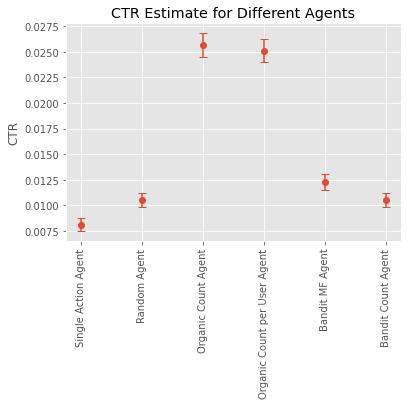

In [18]:
fig = plot_verify_agents(comb_result)
plt.ylabel('CTR')
plt.show()




